In [555]:
from datetime import datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [556]:
DATE_FORMATS = (
    "%B %d, %Y ",
    "%B %d, %Y",
    "%d-%b-%y"
)

BAD_SYMBOLS = (
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
    ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|',
    '}', '~'
)


def plot_records_months(monthly_counts) -> None:
    plt.figure(figsize=(10, 6))

    plt.plot(
        monthly_counts.index,
        monthly_counts["date"],
        marker="o",
        linestyle="-",
        color="b"
        )

    plt.title("Liczba rekordów per miesiąc")
    plt.xlabel("Data")
    plt.ylabel("Liczba rekordów")

    plt.grid(True)
    plt.show()


def to_datetime(date_str: str) -> datetime:
    result = None

    for format in DATE_FORMATS:
        try:
            result = pd.to_datetime(date_str, format=format)
        except ValueError:
            pass

        if result is not None:
            break

    return result



# Real news - Analysing data

In [557]:
df_real = pd.read_csv("data/True.csv")
df_real["label"] = "real"
df_real.dtypes


title      object
text       object
subject    object
date       object
label      object
dtype: object

In [558]:
df_real.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


In [559]:
df_real.isna().sum()


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [560]:
df_real.describe()


,title,text,subject,date,label
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",real
freq,14,8,11272,182,21417


In [561]:
df_real["subject"].value_counts()


subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [562]:
df_real["date_index"] = pd.to_datetime(df_real["date"], format="%B %d, %Y ")
df_real["date"] = pd.to_datetime(df_real["date"], format="%B %d, %Y ")

df_real.set_index("date_index", inplace=True)



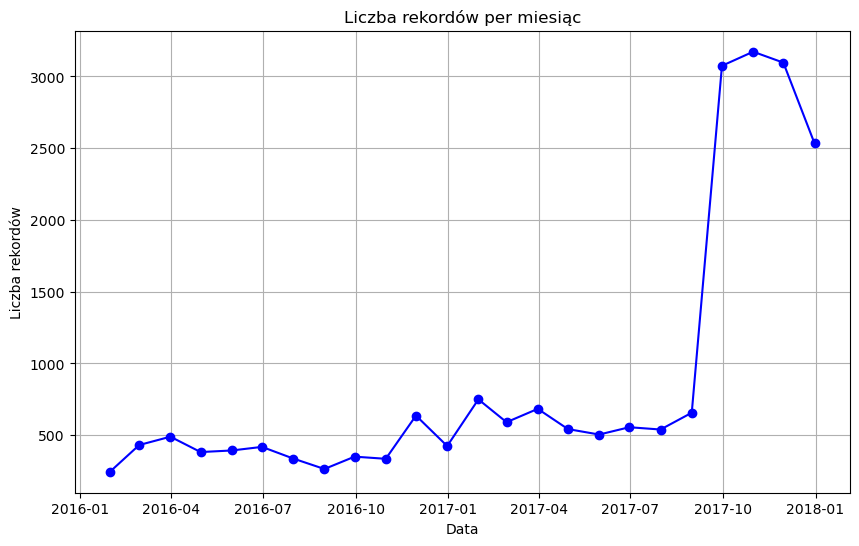

In [563]:
real_monthly_counts = df_real.resample("M").count()
plot_records_months(real_monthly_counts)


In [564]:
print(df_real.shape)
df_real = df_real.drop_duplicates(subset=["text"], ignore_index=True)
print(df_real.shape)


(21417, 5)
(21192, 5)


In [565]:
df_real["all_text"] = df_real["title"] + " " + df_real["text"]
del df_real["title"]
del df_real["text"]
df_real


,subject,date,label,all_text
0,politicsNews,2017-12-31,real,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,2017-12-29,real,U.S. military to accept transgender recruits o...
2,politicsNews,2017-12-31,real,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,2017-12-30,real,FBI Russia probe helped by Australian diplomat...
4,politicsNews,2017-12-29,real,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...
21187,worldnews,2017-08-22,real,'Fully committed' NATO backs new U.S. approach...
21188,worldnews,2017-08-22,real,LexisNexis withdrew two products from Chinese ...
21189,worldnews,2017-08-22,real,Minsk cultural hub becomes haven from authorit...
21190,worldnews,2017-08-22,real,Vatican upbeat on possibility of Pope Francis ...


In [566]:
df_real["all_text"][0]


'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# Fake news - Analysing data

In [567]:
df_fake = pd.read_csv("data/Fake.csv")
df_fake["label"] = "fake"
df_fake.dtypes


title      object
text       object
subject    object
date       object
label      object
dtype: object

In [568]:
print(df_fake.shape)
df_fake = df_fake.drop_duplicates(subset=["text"], ignore_index=True)
print(df_fake.shape)


(23481, 5)
(17455, 5)


In [569]:
df_fake.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17455 entries, 0 to 17454
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    17455 non-null  object
 1   text     17455 non-null  object
 2   subject  17455 non-null  object
 3   date     17455 non-null  object
 4   label    17455 non-null  object
dtypes: object(5)
memory usage: 682.0+ KB


In [570]:
df_fake.isna().sum()


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [571]:
df_fake.describe()


,title,text,subject,date,label
count,17455,17455,17455,17455,17455
unique,17450,17455,5,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Donald Trump just couldn t wish all Americans ...,News,"May 26, 2016",fake
freq,3,1,9050,35,17455


In [572]:
df_fake["subject"].value_counts()


subject
News               9050
politics           6425
US_News             783
left-news           683
Government News     514
Name: count, dtype: int64

In [573]:
df_fake["date_index"] = df_fake["date"].apply(to_datetime)
df_fake


,title,text,subject,date,label,date_index
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,2017-12-25
...,...,...,...,...,...,...
17450,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",fake,2016-01-07
17451,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",fake,2016-01-07
17452,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",fake,2016-01-06
17453,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",fake,2016-01-04


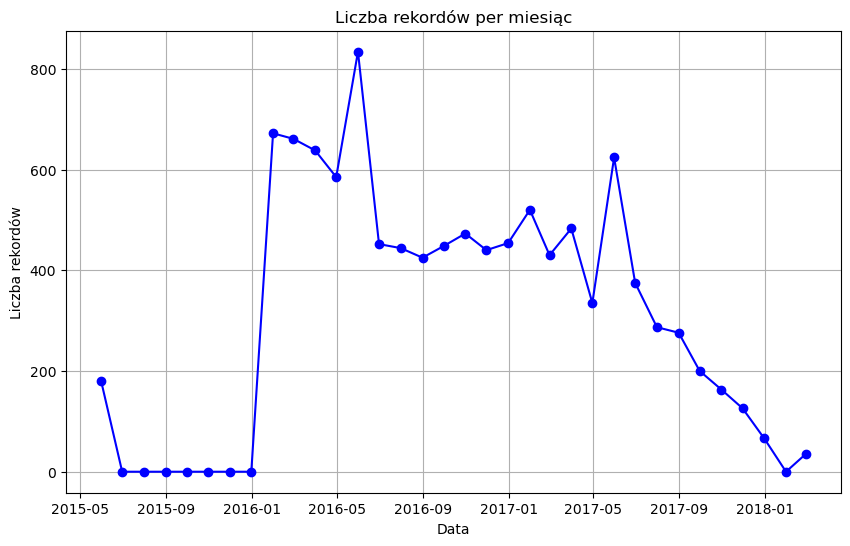

In [574]:
df_fake.set_index("date_index", inplace=True)

fake_monthly_counts = df_fake.resample("M").count()
plot_records_months(fake_monthly_counts)


In [575]:
df_fake["all_text"] = df_fake["title"] + " " + df_fake["text"]
del df_fake["title"]
del df_fake["text"]
df_fake


,subject,date,label,all_text
date_index,,,,
2017-12-31,News,"December 31, 2017",fake,Donald Trump Sends Out Embarrassing New Year’...
2017-12-31,News,"December 31, 2017",fake,Drunk Bragging Trump Staffer Started Russian ...
2017-12-30,News,"December 30, 2017",fake,Sheriff David Clarke Becomes An Internet Joke...
2017-12-29,News,"December 29, 2017",fake,Trump Is So Obsessed He Even Has Obama’s Name...
2017-12-25,News,"December 25, 2017",fake,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
2016-01-07,US_News,"January 7, 2016",fake,The White House and The Theatrics of ‘Gun Cont...
2016-01-07,US_News,"January 7, 2016",fake,Activists or Terrorists? How Media Controls an...
2016-01-06,US_News,"January 6, 2016",fake,"BOILER ROOM – No Surrender, No Retreat, Heads ..."


# Concatenating data


In [576]:
df = pd.concat([df_real, df_fake])
df.reset_index(drop=True, inplace=True)

print(df.shape)

df.head()


(38647, 4)


,subject,date,label,all_text
0,politicsNews,2017-12-31 00:00:00,real,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,2017-12-29 00:00:00,real,U.S. military to accept transgender recruits o...
2,politicsNews,2017-12-31 00:00:00,real,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,2017-12-30 00:00:00,real,FBI Russia probe helped by Australian diplomat...
4,politicsNews,2017-12-29 00:00:00,real,Trump wants Postal Service to charge 'much mor...


/home/nolok/anaconda3/envs/zprp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nolok/anaconda3/envs/zprp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nolok/anaconda3/envs/zprp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Etykieta', ylabel='Średnia długość'>

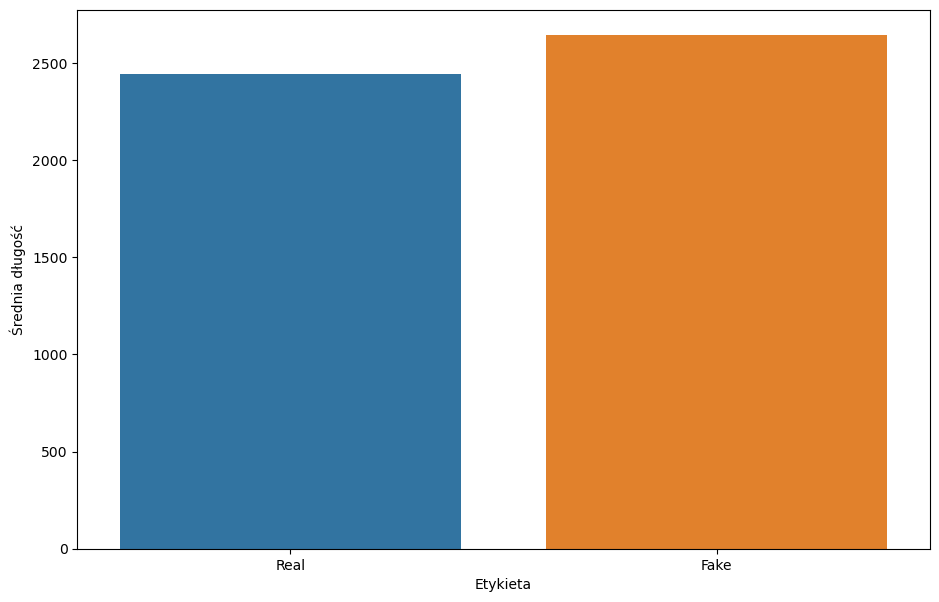

In [577]:
avg_len_real = df[df["label"] == "real"]["all_text"].apply(
    lambda x: len(x)
    ).mean()

avg_len_fake = df[df["label"] == "fake"]["all_text"].apply(
    lambda x: len(x)
    ).mean()

avg_len = pd.DataFrame(
    data = {"Średnia długość": [avg_len_real, avg_len_fake],
            "Etykieta": ["Real", "Fake"]}
            )

fig, bar = plt.subplots(figsize = (11, 7))
sns.barplot(y="Średnia długość", x="Etykieta", data=avg_len)


In [578]:
def lower_text(text: str) -> str:
    return text.lower()


def remove_html(text: str):
    return re.sub("()", "", text, flags=re.DOTALL)


def remove_url(text: str) -> str:
    return re.sub(r'https?:\/\/.\S+', "", text)


def remove_brackets(text: str) -> str:
    text = re.sub("\\[]", "", text)
    text = re.sub("\\(\\)", "", text)
    text = re.sub("\\{}", "", text)
    text = re.sub("\\]", "", text)
    text = re.sub("\\[", "", text)
    return text


def remove_bad_symbols(text: str) -> str:
    for bad_symbol in BAD_SYMBOLS:
        text = text.replace(bad_symbol, "")
    return text


def clear_text(text: str) -> str:
    text = lower_text(text)
    text = remove_html(text)
    text = remove_url(text)
    text = remove_brackets(text)
    text = remove_bad_symbols(text)
    return text


In [579]:
df["clear_text"] = df["all_text"].apply(clear_text)
df


,subject,date,label,all_text,clear_text
0,politicsNews,2017-12-31 00:00:00,real,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...
1,politicsNews,2017-12-29 00:00:00,real,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...
2,politicsNews,2017-12-31 00:00:00,real,Senior U.S. Republican senator: 'Let Mr. Muell...,senior us republican senator let mr mueller do...
3,politicsNews,2017-12-30 00:00:00,real,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...
4,politicsNews,2017-12-29 00:00:00,real,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge much more...
...,...,...,...,...,...
38642,US_News,"January 7, 2016",fake,The White House and The Theatrics of ‘Gun Cont...,the white house and the theatrics of ‘gun cont...
38643,US_News,"January 7, 2016",fake,Activists or Terrorists? How Media Controls an...,activists or terrorists how media controls and...
38644,US_News,"January 6, 2016",fake,"BOILER ROOM – No Surrender, No Retreat, Heads ...",boiler room – no surrender no retreat heads wi...
38645,US_News,"January 4, 2016",fake,Federal Showdown Looms in Oregon After BLM Abu...,federal showdown looms in oregon after blm abu...
